# Antenna plots for reco paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os

import seaborn as sns

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

current_palette = sns.color_palette('colorblind', 10)

In [8]:
theta = np.pi/2
phi = 0
freqs = np.linspace(0,1,1001)
hpol_pol = np.array([-np.sin(phi),np.cos(phi),-1/np.sin(theta)])
vpol_pol = np.array([-np.sin(phi),np.cos(phi),-1/np.sin(theta)])

## Hpol

In [9]:
hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

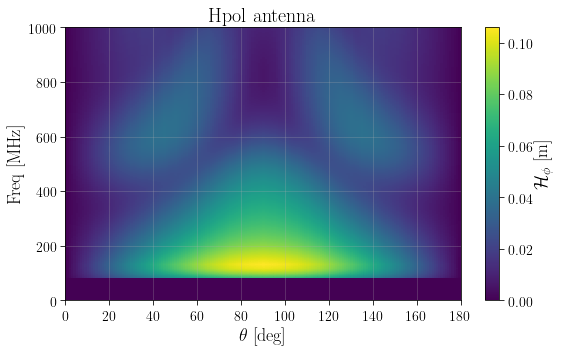

In [10]:
plt.figure(figsize=(8,5))
thetas = np.linspace(0, 180, 181)
X, Y = np.meshgrid(thetas, freqs)
hpol_resp = [hpol.antenna.directional_response(theta, phi, hpol_pol)(freqs*1E9)*hpol.antenna.frequency_response(freqs*1E9) for theta in np.radians(thetas)]
cmap=plt.pcolormesh(X.T, 1000*Y.T, abs(np.array(hpol_resp)),shading='gouring',rasterized=True)
plt.colorbar(cmap,label='$\mathcal{H}_{\phi}$ [m]')
plt.ylim(0,1000)
plt.xlim(0,180)
plt.ylabel("Freq [MHz]")
plt.xlabel("$\\theta$ [deg]")
plt.grid(alpha=0.3)
plt.title("Hpol antenna")
plt.tight_layout()
# plt.savefig("./plots/Antennas/ChibaHpol_zenith_response.pdf")

## Vpol

In [11]:
vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

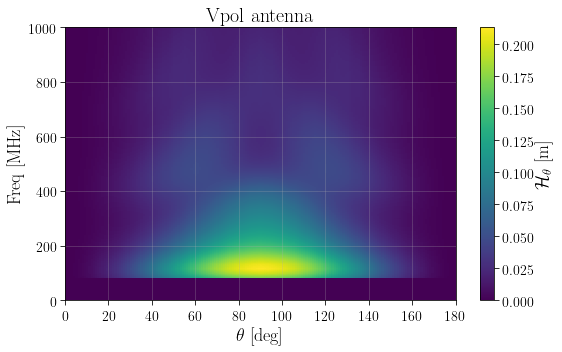

In [15]:
plt.figure(figsize=(8,5))

X, Y = np.meshgrid(thetas, freqs)
vpol_resp = [vpol.antenna.directional_response(theta, phi, hpol_pol)(freqs*1E9)*vpol.antenna.frequency_response(freqs*1E9) for theta in np.radians(thetas)]
cmap=plt.pcolormesh(X.T, 1000*Y.T, abs(np.array(vpol_resp)),shading='gouring',rasterized=True)
plt.colorbar(cmap,label='$\mathcal{H}_{\\theta}$ [m]')
plt.ylim(0,1000)
plt.xlim(0,180)
plt.ylabel("Freq [MHz]")
plt.xlabel("$\\theta$ [deg]")
plt.grid(alpha=0.3)
plt.title("Vpol antenna")
plt.tight_layout()
# plt.savefig("./Plots/Antennas/ChibaHpol_zenith_response.pdf")

## Plot them side to side

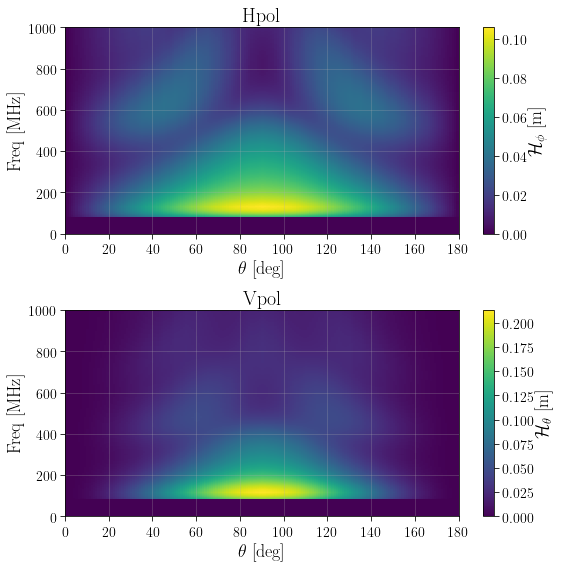

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(8,8))

hpol_resp = [hpol.antenna.directional_response(theta, phi, hpol_pol)(freqs*1E9)*hpol.antenna.frequency_response(freqs*1E9) for theta in np.radians(thetas)]
cmap=axs[0].pcolormesh(X.T, 1000*Y.T, abs(np.array(hpol_resp)),shading='gouring',rasterized=True)

plt.colorbar(cmap,label='$\mathcal{H}_{\phi}$ [m]', ax = axs[0])
axs[0].set_ylim(0,1000)
axs[0].set_xlim(0,180)
axs[0].set_ylabel("Freq [MHz]")
axs[0].set_xlabel("$\\theta$ [deg]")
axs[0].grid(alpha=0.3)
axs[0].set_title("Hpol")


vpol_resp = [vpol.antenna.directional_response(theta, phi, hpol_pol)(freqs*1E9)*vpol.antenna.frequency_response(freqs*1E9) for theta in np.radians(thetas)]
cmap=plt.pcolormesh(X.T, 1000*Y.T, abs(np.array(vpol_resp)),shading='gouring',rasterized=True)

plt.colorbar(cmap,label='$\mathcal{H}_{\\theta}$ [m]',ax = axs[1])
axs[1].set_ylim(0,1000)
axs[1].set_xlim(0,180)
axs[1].set_ylabel("Freq [MHz]")
axs[1].set_xlabel("$\\theta$ [deg]")
axs[1].grid(alpha=0.3)
axs[1].set_title("Vpol")

plt.tight_layout()
plt.savefig("./Plots/Chiba_zenith_response.pdf")